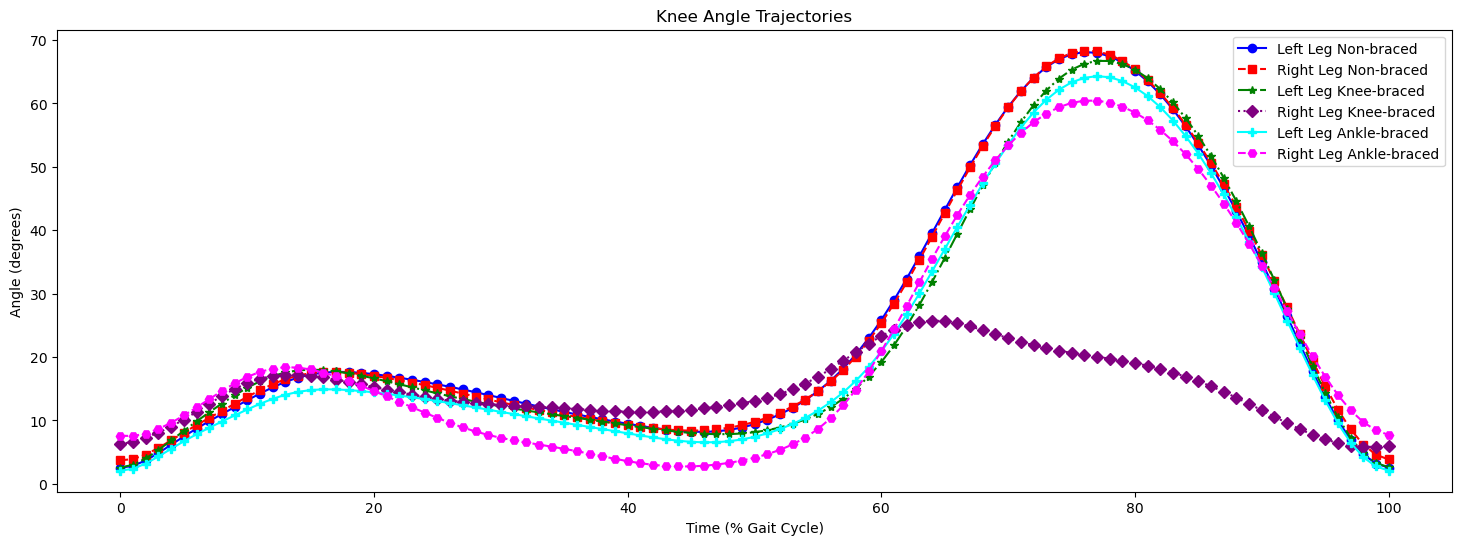

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
gait_data = pd.read_csv('gait.csv')

# Define styles for each scenario
styles = {
    'Left Leg Non-braced': {'color': 'blue', 'linestyle': '-', 'marker': 'o'},
    'Right Leg Non-braced': {'color': 'red', 'linestyle': '--', 'marker': 's'},
    'Left Leg Knee-braced': {'color': 'green', 'linestyle': '-.', 'marker': '*'},
    'Right Leg Knee-braced': {'color': 'purple', 'linestyle': ':', 'marker': 'D'},
    'Left Leg Ankle-braced': {'color': 'cyan', 'linestyle': '-', 'marker': 'P'},
    'Right Leg Ankle-braced': {'color': 'magenta', 'linestyle': '--', 'marker': 'H'}
}

# Plot knee joint angle trajectories function
def plot_knee_trajectory(leg, condition, label, ax):

    # Filter data
    knee_data = gait_data[(gait_data['leg'] == leg) & (gait_data['condition'] == condition) & (gait_data['joint'] == 2)]
    
    # Average the angles across all subjects and replications for each time point
    avg_angle = knee_data.groupby('time')['angle'].mean()
    
    # Plot the averaged angles against the time points on the given axis
    ax.plot(avg_angle, label=label)

# Plot knee angle trajectories 
plt.figure(figsize=(18, 6))
scenarios_ankle = [
    (1, 1, 'Left Leg Non-braced'),
    (2, 1, 'Right Leg Non-braced'),
    (1, 2, 'Left Leg Knee-braced'),
    (2, 2, 'Right Leg Knee-braced'),
    (1, 3, 'Left Leg Ankle-braced'),
    (2, 3, 'Right Leg Ankle-braced')
]
for leg, condition, label in scenarios_ankle:
    plot_knee_trajectory(leg, condition, label, plt.gca())
    plt.gca().lines[-1].set_color(styles[label]['color'])
    plt.gca().lines[-1].set_linestyle(styles[label]['linestyle'])
    plt.gca().lines[-1].set_marker(styles[label]['marker'])

plt.title('Knee Angle Trajectories')
plt.xlabel('Time (% Gait Cycle)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.show()


In [86]:
comparative_analysis_knee = {}
for leg, condition, label in scenarios_ankle:

    # Filter data for the specific leg, condition, and joint (knee)
    knee_data = gait_data[(gait_data['leg'] == leg) & (gait_data['condition'] == condition) & (gait_data['joint'] == 2)]
    # Calculate the average knee angle across all subjects and replications for each time point
    avg_angle_knee = knee_data.groupby('time')['angle'].mean()
    comparative_analysis_knee[label] = {
        'Mean Knee Angle': avg_angle_knee.mean(),
        'Peak Flexion': avg_angle_knee.max(),
        'Peak Extension': avg_angle_knee.min()
    }

comparative_analysis_knee_df = pd.DataFrame(comparative_analysis_knee).T

comparative_analysis_knee_df


,Mean Knee Angle,Peak Flexion,Peak Extension
Left Leg Non-braced,24.959007,68.100117,2.535291
Right Leg Non-braced,25.137298,68.317294,3.711766
Left Leg Knee-braced,23.768118,66.713959,2.567670
Right Leg Knee-braced,15.001274,25.757426,5.838427
Left Leg Ankle-braced,22.501955,64.304263,2.068238
Right Leg Ankle-braced,22.019148,60.444202,2.740586


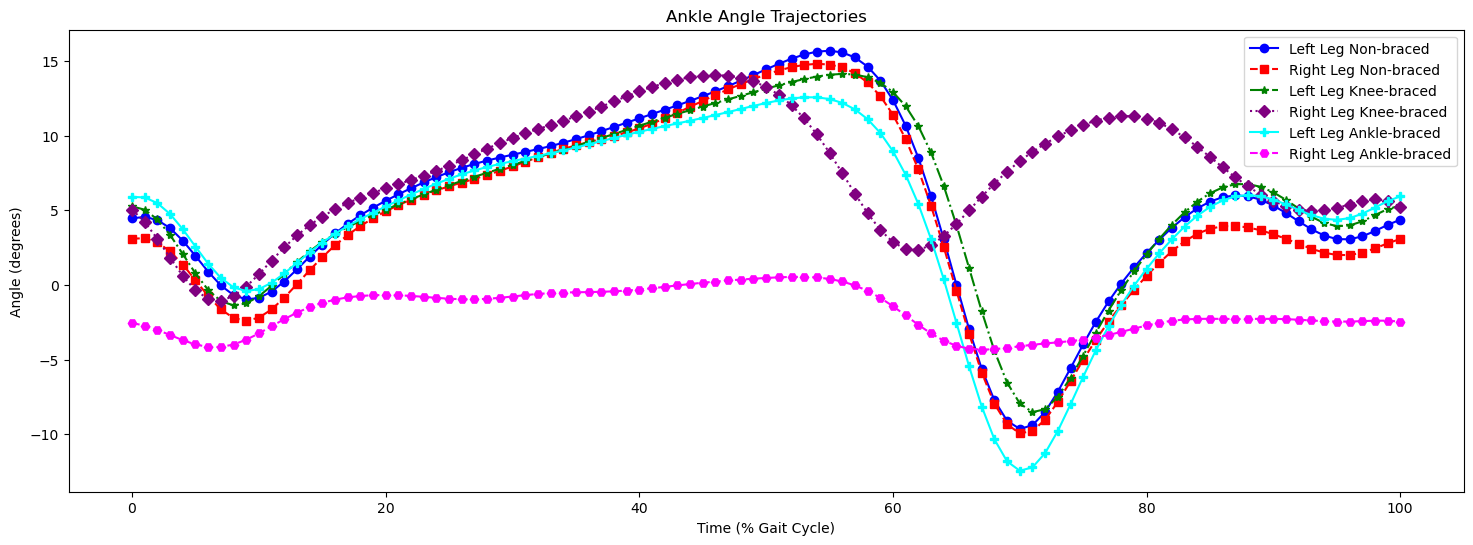

In [93]:
def plot_ankle_trajectory(leg, condition, label, ax):

    # Filter data for the specific leg, condition, and joint (ankle)
    ankle_data = gait_data[(gait_data['leg'] == leg) & (gait_data['condition'] == condition) & (gait_data['joint'] == 1)]
    
    # Average the angles across all subjects and replications for each time point
    avg_angle = ankle_data.groupby('time')['angle'].mean()
    
    # Plot the averaged angles against the time points on the given axis
    ax.plot(avg_angle, label=label)

# Plot ankle joint angle trajectories 
plt.figure(figsize=(18, 6))
for leg, condition, label in scenarios_ankle:
    plot_ankle_trajectory(leg, condition, label, plt.gca())
    plt.gca().lines[-1].set_color(styles[label]['color'])
    plt.gca().lines[-1].set_linestyle(styles[label]['linestyle'])
    plt.gca().lines[-1].set_marker(styles[label]['marker'])

plt.title('Ankle Angle Trajectories')
plt.xlabel('Time (% Gait Cycle)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.show()


In [89]:
comparative_analysis_ankle = {}

# Calculate mean, peak flexion, and peak extension for each scenario for the ankle
for leg, condition, label in scenarios_ankle:
    # Filter data for the specific leg, condition, and joint (ankle)
    ankle_data = gait_data[(gait_data['leg'] == leg) & (gait_data['condition'] == condition) & (gait_data['joint'] == 1)]
    # Calculate the average ankle angle across all subjects and replications for each time point
    avg_angle_ankle = ankle_data.groupby('time')['angle'].mean()
    comparative_analysis_ankle[label] = {
        'Mean Ankle Angle': avg_angle_ankle.mean(),
        'Peak Flexion': avg_angle_ankle.max(),
        'Peak Extension': avg_angle_ankle.min()
    }


comparative_analysis_ankle_df = pd.DataFrame(comparative_analysis_ankle).T

comparative_analysis_ankle_df


,Mean Ankle Angle,Peak Flexion,Peak Extension
Left Leg Non-braced,5.426558,15.689369,-9.639664
Right Leg Non-braced,4.458144,14.811163,-9.934145
Left Leg Knee-braced,5.482138,14.137621,-8.516808
Right Leg Knee-braced,7.535830,14.057358,-1.054105
Left Leg Ankle-braced,4.575153,12.571179,-12.439286
Right Leg Ankle-braced,-1.807487,0.542336,-4.332286


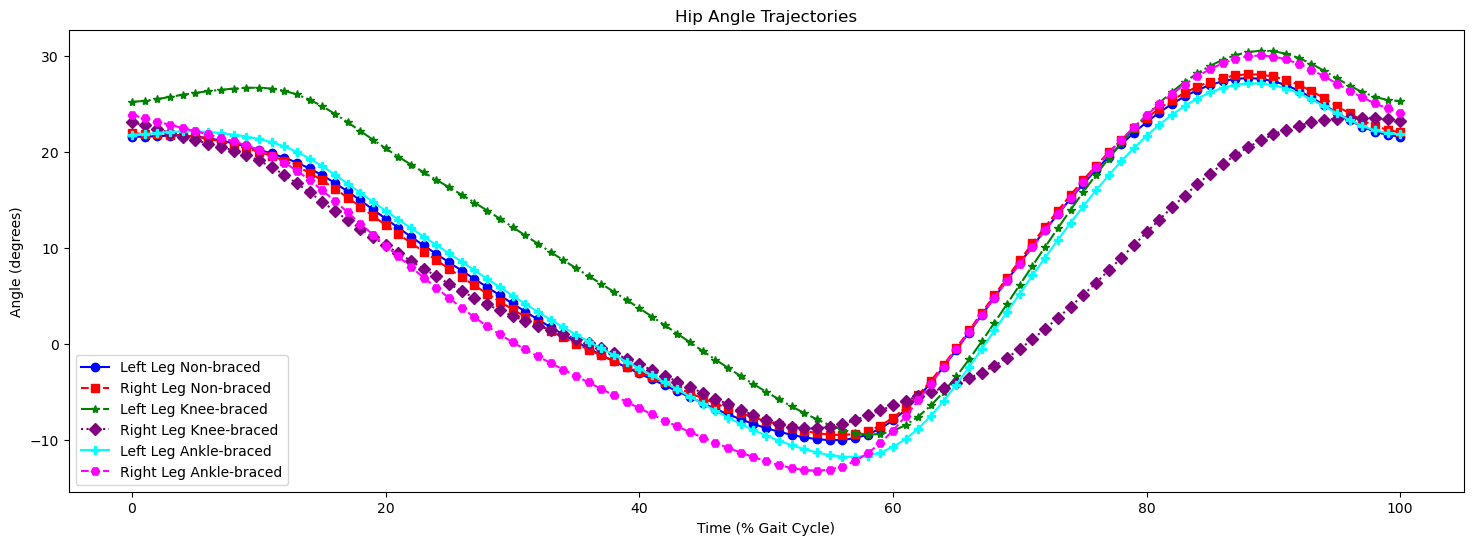

In [92]:
def plot_hip_trajectory(leg, condition, label, ax):
    """
    Plot hip joint angle trajectory for a specific scenario on a given axis.
    """
    # Filter data for the specific leg, condition, and joint (hip)
    hip_data = gait_data[(gait_data['leg'] == leg) & (gait_data['condition'] == condition) & (gait_data['joint'] == 3)]
    
    # Average the angles across all subjects and replications for each time point
    avg_angle = hip_data.groupby('time')['angle'].mean()
    
    # Plot the averaged angles against the time points on the given axis
    ax.plot(avg_angle, label=label)

# Plot hip joint angle trajectories 
plt.figure(figsize=(18, 6))
for leg, condition, label in scenarios_ankle:
    plot_hip_trajectory(leg, condition, label, plt.gca())
    plt.gca().lines[-1].set_color(styles[label]['color'])
    plt.gca().lines[-1].set_linestyle(styles[label]['linestyle'])
    plt.gca().lines[-1].set_marker(styles[label]['marker'])

plt.title('Hip Angle Trajectories')
plt.xlabel('Time (% Gait Cycle)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.show()


In [91]:
# Create a dictionary to store the results for the hip
comparative_analysis_hip = {}

# Calculate mean, peak flexion, and peak extension for each scenario for the hip
for leg, condition, label in scenarios_ankle:
    # Filter data for the specific leg, condition, and joint (hip)
    hip_data = gait_data[(gait_data['leg'] == leg) & (gait_data['condition'] == condition) & (gait_data['joint'] == 3)]
    
    # Calculate the average hip angle across all subjects and replications for each time point
    avg_angle = hip_data.groupby('time')['angle'].mean()
    
    comparative_analysis_hip[label] = {
        'Mean Hip Angle': avg_angle.mean(),
        'Peak Flexion': avg_angle.max(),
        'Peak Extension': avg_angle.min()
    }

comparative_analysis_hip_df = pd.DataFrame(comparative_analysis_hip).T
comparative_analysis_hip_df


,Mean Hip Angle,Peak Flexion,Peak Extension
Left Leg Non-braced,9.993212,27.727745,-9.996398
Right Leg Non-braced,10.125009,28.116379,-9.468613
Left Leg Knee-braced,13.628500,30.572248,-9.413613
Right Leg Knee-braced,7.344285,23.611644,-8.777806
Left Leg Ankle-braced,9.485970,27.179136,-11.755497
Right Leg Ankle-braced,9.053663,30.078961,-13.181257
